<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт необходмых библиотек**

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
import requests
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from PIL import Image
from sklearn.cluster import DBSCAN
from io import BytesIO
from sklearn.cluster import AgglomerativeClustering
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
import pandas as pd

**1. Получите данные и загрузите их в рабочую среду.**

In [ ]:
def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        new_image = cv2.merge([r, g, b])
    else:
        new_image = image

resp = requests.get('https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg', stream=True).raw
image_array = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

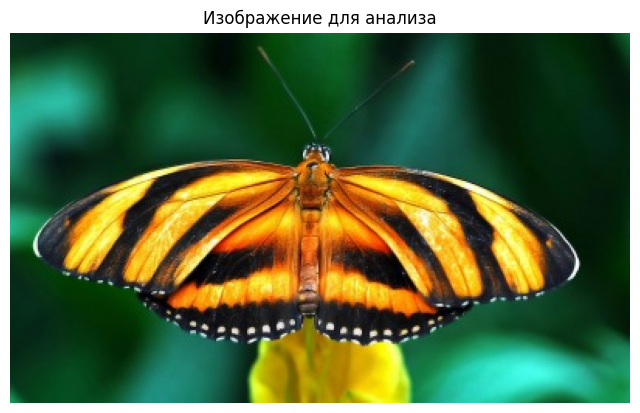

In [ ]:
# Визуализация изображения с помощью matplotlib, конвертация BGR в RGB
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Изображение для анализа')
plt.axis('off')
plt.show()

**2. Реализуйте три модели кластеризации:**

**a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.**

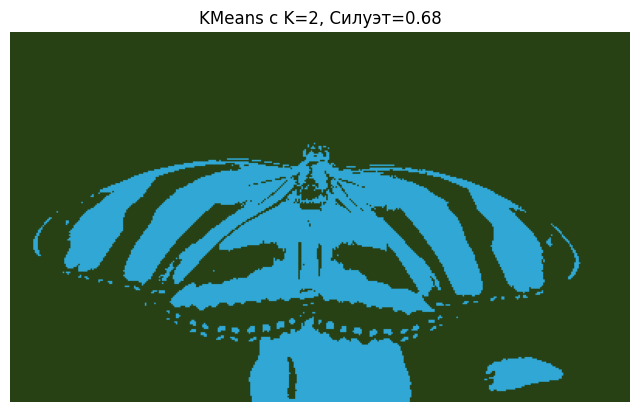

In [ ]:
# Преобразуем изображение в двумерный массив
pixels = image.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels)

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)

silhouette_avg2 = silhouette_score(pixels_reduced, labels)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(image.shape)

plt.figure(figsize=(8, 6))
plt.imshow(clustered_image.astype(np.uint8))
plt.title(f'KMeans с K=2, Силуэт={silhouette_avg2:.2f}')
plt.axis('off')
plt.show()

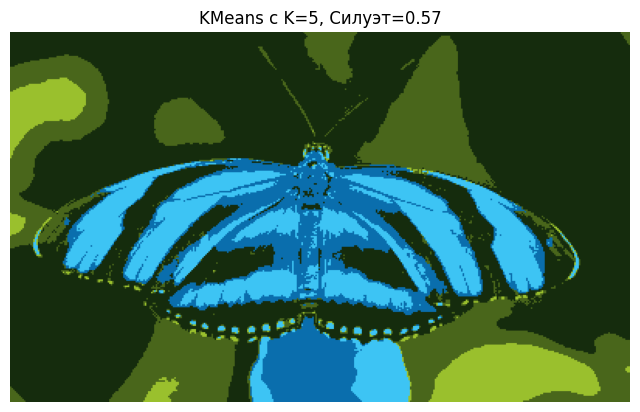

In [ ]:
# Преобразуем изображение в двумерный массив
pixels = image.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels)

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)

silhouette_avg5 = silhouette_score(pixels_reduced, labels)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(image.shape)

plt.figure(figsize=(8, 6))
plt.imshow(clustered_image.astype(np.uint8))
plt.title(f'KMeans с K=5, Силуэт={silhouette_avg5:.2f}')
plt.axis('off')
plt.show()

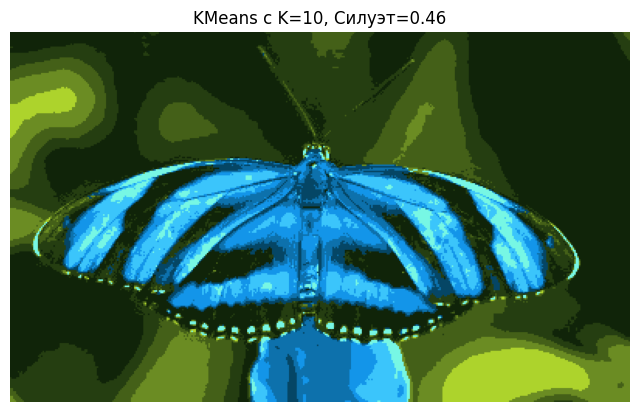

In [ ]:
# Преобразуем изображение в двумерный массив
pixels = image.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels)

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)

silhouette_avg10 = silhouette_score(pixels_reduced, labels)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(image.shape)

plt.figure(figsize=(8, 6))
plt.imshow(clustered_image.astype(np.uint8))
plt.title(f'KMeans с K=10, Силуэт={silhouette_avg10:.2f}')
plt.axis('off')
plt.show()

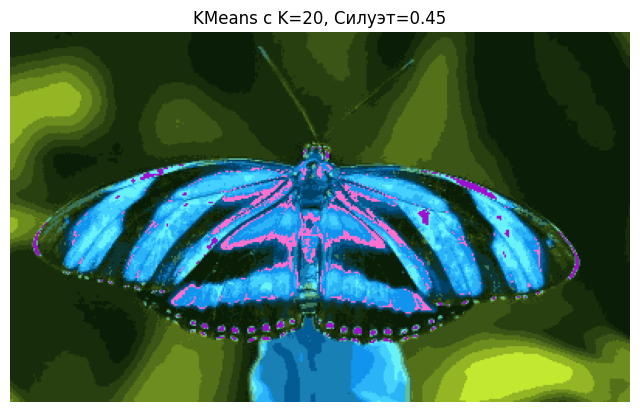

In [ ]:
# Преобразуем изображение в двумерный массив
pixels = image.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels)

kmeans = KMeans(n_clusters=20, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)

silhouette_avg20 = silhouette_score(pixels_reduced, labels)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(image.shape)

plt.figure(figsize=(8, 6))
plt.imshow(clustered_image.astype(np.uint8))
plt.title(f'KMeans с K=20, Силуэт={silhouette_avg20:.2f}')
plt.axis('off')
plt.show()

**b) DBSCAN.**

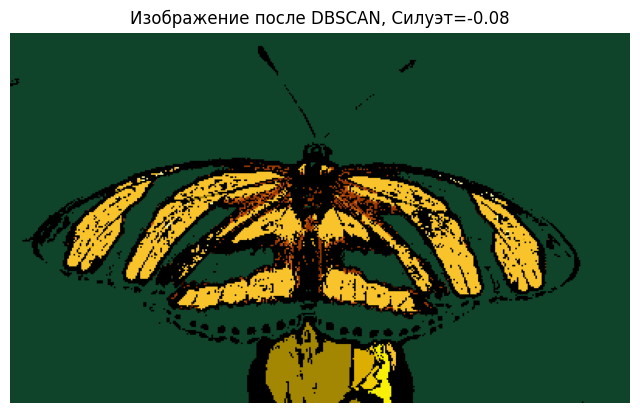

In [ ]:
# Загрузка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Преобразование изображения в массив numpy и решейпинг для кластеризации
pixels = np.array(img)
pixels_reshaped = pixels.reshape(-1, 3)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=5, min_samples=25)  # Подбирал различные варианты
labels = dbscan.fit_predict(pixels_reshaped)

# Преобразование меток кластеров в изображение
unique_labels = np.unique(labels)
new_pixels = np.zeros_like(pixels_reshaped)

for label in unique_labels:
    if label != -1:  # игнорируем шум
        mask = labels == label
        color_mean = np.mean(pixels_reshaped[mask], axis=0)
        new_pixels[mask] = color_mean

new_img = Image.fromarray(new_pixels.reshape(pixels.shape))
silhouette_avg_DB = silhouette_score(pixels_reshaped, labels)

# Визуализация нового изображения
plt.figure(figsize=(8,6))
plt.title(f'Изображение после DBSCAN, Силуэт={silhouette_avg_DB:.2f}')
plt.imshow(new_img)
plt.axis('off')
plt.show()

**c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.**

In [ ]:
# Загрузка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
pixels = np.array(img)
pixels_reshaped = pixels.reshape(-1, 3)

# Подвыборка данных
n = 5
pixels_sampled = pixels_reshaped[::n]

pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels_sampled)

n_clusters_list = [2, 5, 10, 20]
results = []

for n_clusters in n_clusters_list:
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglo.fit_predict(pixels_reduced)

    # Силуэтный коэффициент для подвыборки данных, чтобы уменьшить использование памяти
    n_sample_silhouette = 5000  # Ограничение числа пикселей для вычисления силуэта
    if len(pixels_reduced) > n_sample_silhouette:
        indices_silhouette = np.random.choice(range(len(pixels_reduced)), size=n_sample_silhouette, replace=False)
        silhouette_avg = silhouette_score(pixels_reduced[indices_silhouette], labels[indices_silhouette])
    else:
        silhouette_avg = silhouette_score(pixels_reduced, labels)

    results.append({'Method': 'AgglomerativeClustering', 'N Clusters': n_clusters, 'Silhouette Score': silhouette_avg})

    print(f'Agglomerative Clustering с K={n_clusters}, Силуэт = {silhouette_avg:.2f}')

Agglomerative Clustering с K=2, Силуэт = 0.67
Agglomerative Clustering с K=5, Силуэт = 0.56
Agglomerative Clustering с K=10, Силуэт = 0.46
Agglomerative Clustering с K=20, Силуэт = 0.40


In [ ]:
AC2 = 0.67
AC5 = 0.56
AC10 = 0.46
AC20 = 0.40

**3.Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.**

In [ ]:
# Загрузка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
pixels = np.array(img)
pixels_reshaped = pixels.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels_reshaped)

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(pixels_reshaped.shape)
clustered_image_float = img_as_float(clustered_image.astype(np.uint8))
original_image_float = img_as_float(pixels_reshaped)

ssim_value2 = ssim(original_image_float, clustered_image_float, channel_axis=-1)
print(f'KMeans с K=2, SSIM: {ssim_value2:.4f}')

KMeans с K=2, SSIM: 0.6588


In [ ]:
# Загрузка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
pixels = np.array(img)
pixels_reshaped = pixels.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels_reshaped)

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(pixels_reshaped.shape)
clustered_image_float = img_as_float(clustered_image.astype(np.uint8))
original_image_float = img_as_float(pixels_reshaped)

ssim_value5 = ssim(original_image_float, clustered_image_float, channel_axis=-1)
print(f'KMeans с K=5, SSIM: {ssim_value5:.4f}')

KMeans с K=5, SSIM: 0.7574


In [ ]:
# Загрузка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
pixels = np.array(img)
pixels_reshaped = pixels.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels_reshaped)

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(pixels_reshaped.shape)
clustered_image_float = img_as_float(clustered_image.astype(np.uint8))
original_image_float = img_as_float(pixels_reshaped)

ssim_value10 = ssim(original_image_float, clustered_image_float, channel_axis=-1)
print(f'KMeans с K=10, SSIM: {ssim_value10:.4f}')

KMeans с K=10, SSIM: 0.8206


In [ ]:
# Загрузка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
pixels = np.array(img)
pixels_reshaped = pixels.reshape(-1, 3)

# Уменьшаем размерность для ускорения кластеризации
pca = PCA(n_components=0.95)
pixels_reduced = pca.fit_transform(pixels_reshaped)

kmeans = KMeans(n_clusters=20, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels_reduced)
clustered_pixels = pca.inverse_transform(kmeans.cluster_centers_[labels])
clustered_image = clustered_pixels.reshape(pixels_reshaped.shape)
clustered_image_float = img_as_float(clustered_image.astype(np.uint8))
original_image_float = img_as_float(pixels_reshaped)

ssim_value20 = ssim(original_image_float, clustered_image_float, channel_axis=-1)
print(f'KMeans с K=20, SSIM: {ssim_value20:.4f}')

KMeans с K=20, SSIM: 0.8435


**b) DBSCAN.**

In [ ]:
# Загрузка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
image = Image.open(BytesIO(response.content))

# Преобразование изображения в массив numpy
pixels = np.array(image)

# Нормализация и изменение формы массива для кластеризации
pixels_normalized = pixels / 255.0  # Нормализация значений пикселей до [0, 1]
pixels_reshaped = pixels_normalized.reshape(-1, 3)  # Изменение формы для обработки каждого пикселя

# Уменьшение размерности для ускорения кластеризации
pca = PCA(n_components=0.8)
pixels_reduced = pca.fit_transform(pixels_reshaped)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=5, min_samples=25)
labels = dbscan.fit_predict(pixels_reduced)

# Маска для идентификации шума (выбросов)
mask_noise = labels != -1
unique_labels = np.unique(labels[mask_noise])

# Формирование нового изображения на основе кластеризации
new_pixels = np.zeros_like(pixels_reshaped)
for label in unique_labels:
    mask = labels == label
    new_pixels[mask] = np.mean(pixels_reshaped[mask], axis=0)

# Восстановление размерности и денормализация значений пикселей
new_image_array = pca.inverse_transform(new_pixels).reshape(pixels.shape)
new_image_array = np.clip(new_image_array * 255, 0, 255).astype(np.uint8)

# Исходное и обработанное изображение в формате float для расчета SSIM
original_image_float = img_as_float(pixels)
new_image_float = img_as_float(new_image_array)

# Расчет SSIM
ssim_valueDB = ssim(original_image_float, new_image_float, multichannel=True)
print(f'SSIM: {ssim_valueDB:.4f}')

Колабу не хватает ОЗУ для обработки кода

**c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.**

In [ ]:
# Загрузка и предобработка изображения
img_url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/btf.jpg'
response = requests.get(img_url)
image = Image.open(BytesIO(response.content)).convert("RGB")
pixels = np.array(image)

# Преобразование изображения в двумерный массив [количество пикселей, 3]
pixels_reshaped = pixels.reshape(-1, 3)

# Применение AgglomerativeClustering
# Вы можете настроить количество кластеров (n_clusters)
n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_clustering.fit_predict(pixels_reshaped)

# Восстановление изображения на основе кластеризации
new_pixels = np.zeros_like(pixels_reshaped)
for label in range(n_clusters):
    mask = labels == label
    new_pixels[mask] = np.mean(pixels_reshaped[mask], axis=0)
clustered_image = new_pixels.reshape(pixels.shape)

# Конвертация во float для расчета SSIM
original_float = img_as_float(pixels)
clustered_float = img_as_float(clustered_image)

# Расчет SSIM
ssim_value = ssim(original_float, clustered_float, multichannel=True)
print(f"SSIM между оригинальным и кластеризованным изображением: {ssim_value:.4f}")

# Отображение результатов (опционально, требуется библиотека matplotlib)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].imshow(image)
axes[0].set_title("Оригинальное изображение")
axes[0].axis('off')

axes[1].imshow(clustered_image.astype(np.uint8))
axes[1].set_title("Кластеризованное изображение")
axes[1].axis('off')

plt.show()

Колабу не хватает ОЗУ для обработки кода

In [ ]:
# Создание словаря для записи результатов
results = pd.DataFrame(columns=['Метод', 'Силуэт', 'SSIM'])

In [ ]:
results.loc[len(results)] = ['KMeans K=2', silhouette_avg2, ssim_value2]
results.loc[len(results)] = ['KMeans K=5', silhouette_avg5, ssim_value5]
results.loc[len(results)] = ['KMeans K=10', silhouette_avg10, ssim_value10]
results.loc[len(results)] = ['KMeans K=20', silhouette_avg20, ssim_value20]
results.loc[len(results)] = ['DBSCAN', silhouette_avg_DB, 'Не хватло ОЗУ']
results.loc[len(results)] = ['Agglomerative Clustering K=2', AC2, 'Не хватло ОЗУ']
results.loc[len(results)] = ['Agglomerative Clustering K=5', AC5, 'Не хватло ОЗУ']
results.loc[len(results)] = ['Agglomerative Clustering K=10', AC10, 'Не хватло ОЗУ']
results.loc[len(results)] = ['Agglomerative Clustering K=20', AC20, 'Не хватло ОЗУ']

**4. Сформулируйте выводы по проделанной работе.**

**a) Какая модель показала лучший результат?**

Выведем результат по каждой модели

In [ ]:
results

,Метод,Силуэт,SSIM
0,KMeans K=2,0.677972,0.658844
1,KMeans K=5,0.565097,0.757363
2,KMeans K=10,0.463776,0.820594
3,KMeans K=20,0.445529,0.843467
4,DBSCAN,-0.076566,Не хватло ОЗУ
5,Agglomerative Clustering K=2,0.670000,Не хватло ОЗУ
6,Agglomerative Clustering K=5,0.560000,Не хватло ОЗУ
7,Agglomerative Clustering K=10,0.460000,Не хватло ОЗУ
8,Agglomerative Clustering K=20,0.400000,Не хватло ОЗУ


В результате видно, что наибольшее значение силуэта получила модель "KMeans K=2", однако нибольшее значение метрики SSIM получила модель "KMeans K=20".

Для методов "DBSCAN" и "Agglomerative Clustering" не получилось посчитать значение данной метрики, т.к. ОЗУ не хватает ресурсов для вычисления.

На мой взшляд, модель "DBSCAN" показала результат визуально ближе к исходному изображению, но модель "KMeans K=20" показала более детальный результат.